In [5]:
import numpy as np
import umap
import matplotlib.pyplot as plt

In [6]:
embeddings = np.load('embeddings_densenet121.npy')
labels = np.load('labels_densenet121.npy')

In [3]:
# Reduce dimensions with UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
embeddings_umap = umap_model.fit_transform(embeddings)

/root/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/root/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:427: UserWarning: Exited at iteration 390 with accuracies 
[2.10991619e-15 7.76441601e-06 3.17188868e-06 6.66053886e-06]
not reaching the requested tolerance 7.37607479095459e-06.
Use iteration 390 instead with accuracy 
4.399210886979603e-06.

  _, diffusion_map = lobpcg(
/root/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:427: UserWarning: Exited postprocessing with accuracies 
[2.57141664e-15 7.76441616e-06 3.17188824e-06 6.66053889e-06]
not reaching the requested tolerance 7.37607479095459e-06.
  _, diffusion_map = lobpcg(
/root/anaconda3/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an 

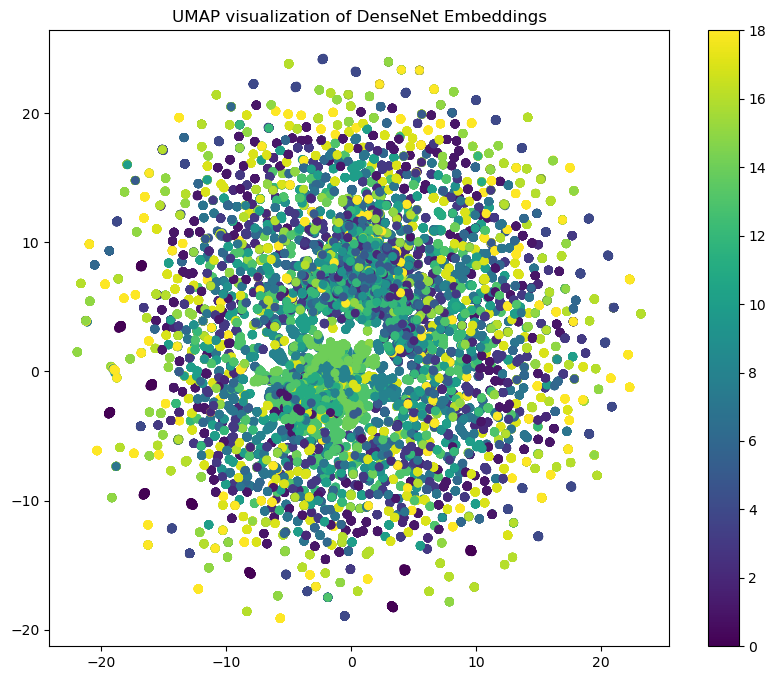

In [4]:
# Plot UMAP result
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=labels, cmap='viridis', s=30)
plt.colorbar()
plt.title("UMAP visualization of DenseNet Embeddings")
plt.show()

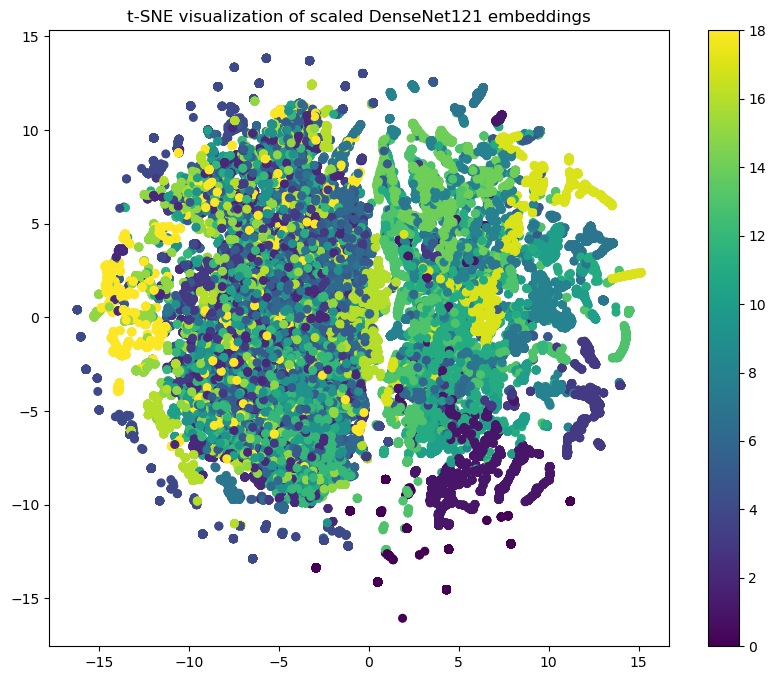

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# First, standardize embeddings
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

# Apply t-SNE after scaling
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
embeddings_tsne = tsne.fit_transform(embeddings_scaled)

# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=labels, cmap='viridis', s=30)
plt.colorbar(scatter)
plt.title("t-SNE visualization of scaled DenseNet121 embeddings")
plt.show()

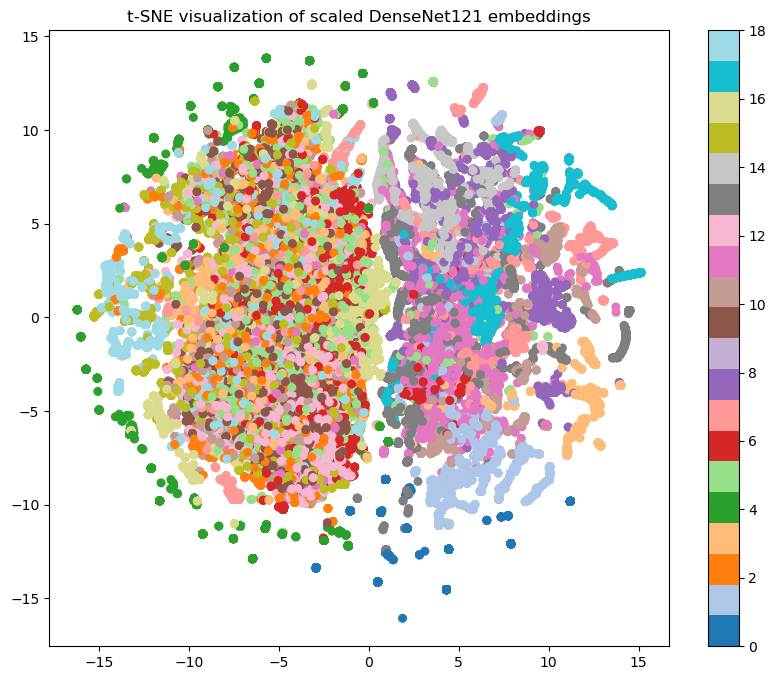

In [8]:
# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=labels, cmap='tab20', s=30)
plt.colorbar(scatter)
plt.title("t-SNE visualization of scaled DenseNet121 embeddings")
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train a k-NN classifier on the embeddings
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(embeddings_scaled, labels)

# Evaluate accuracy
predictions = knn.predict(embeddings_scaled)
accuracy = accuracy_score(labels, predictions)
print(f"k-NN accuracy: {accuracy * 100:.2f}%")

k-NN accuracy: 95.13%


In [11]:
from sklearn.metrics import classification_report
report = classification_report(labels, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3438
           1       0.98      1.00      0.99      3427
           2       0.87      0.97      0.92      3218
           3       0.96      0.98      0.97      3407
           4       1.00      1.00      1.00      3456
           5       0.85      0.70      0.77      3396
           6       0.91      0.99      0.95      3449
           7       0.98      0.98      0.98      3447
           8       0.98      0.98      0.98      3613
           9       0.86      0.88      0.87      3496
          10       0.94      0.96      0.95      3455
          11       0.98      0.81      0.89      3435
          12       0.93      0.85      0.89      3610
          13       0.99      0.99      0.99      3494
          14       0.97      1.00      0.99      3469
          15       0.95      1.00      0.97      3458
          16       0.96      1.00      0.98      3496
          17       0.98    

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Apply k-means clustering
kmeans = KMeans(n_clusters=len(set(labels)), random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_scaled)

# Evaluate using Adjusted Rand Index (ARI)
ari = adjusted_rand_score(labels, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

# Evaluate clustering with silhouette score
sil_score = silhouette_score(embeddings_scaled, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

Adjusted Rand Index (ARI): 0.1613
Silhouette Score: 0.0541
